Summary Statistics:
         Customer ID          Age Gender Item Purchased  Category  \
count   3900.000000  3900.000000   3900           3900      3900   
unique          NaN          NaN      2             25         4   
top             NaN          NaN   Male         Blouse  Clothing   
freq            NaN          NaN   2652            171      1737   
mean    1950.500000    44.068462    NaN            NaN       NaN   
std     1125.977353    15.207589    NaN            NaN       NaN   
min        1.000000    18.000000    NaN            NaN       NaN   
25%      975.750000    31.000000    NaN            NaN       NaN   
50%     1950.500000    44.000000    NaN            NaN       NaN   
75%     2925.250000    57.000000    NaN            NaN       NaN   
max     3900.000000    70.000000    NaN            NaN       NaN   

        Purchase Amount (USD) Location  Size  Color  Season  Review Rating  \
count             3900.000000     3900  3900   3900    3900    3900.000000   
unique

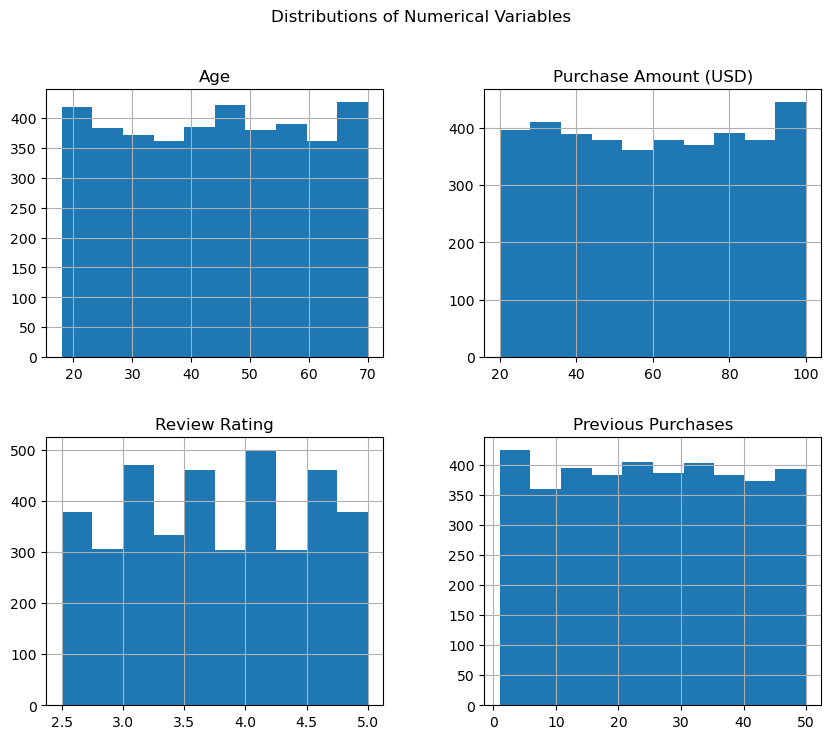


Correlation Matrix:
                        Customer ID       Age  Purchase Amount (USD)  \
Customer ID               1.000000 -0.004079               0.011048   
Age                      -0.004079  1.000000              -0.010424   
Purchase Amount (USD)     0.011048 -0.010424               1.000000   
Review Rating             0.001343 -0.021949               0.030776   
Previous Purchases       -0.039159  0.040445               0.008063   

                       Review Rating  Previous Purchases  
Customer ID                 0.001343           -0.039159  
Age                        -0.021949            0.040445  
Purchase Amount (USD)       0.030776            0.008063  
Review Rating               1.000000            0.004229  
Previous Purchases          0.004229            1.000000  


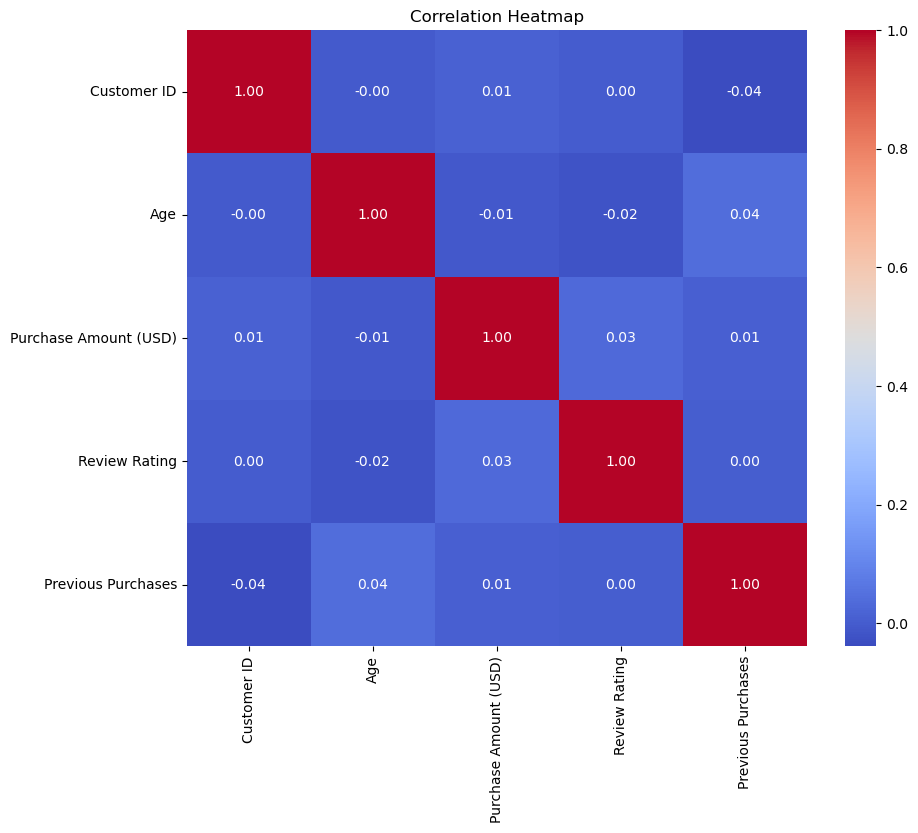

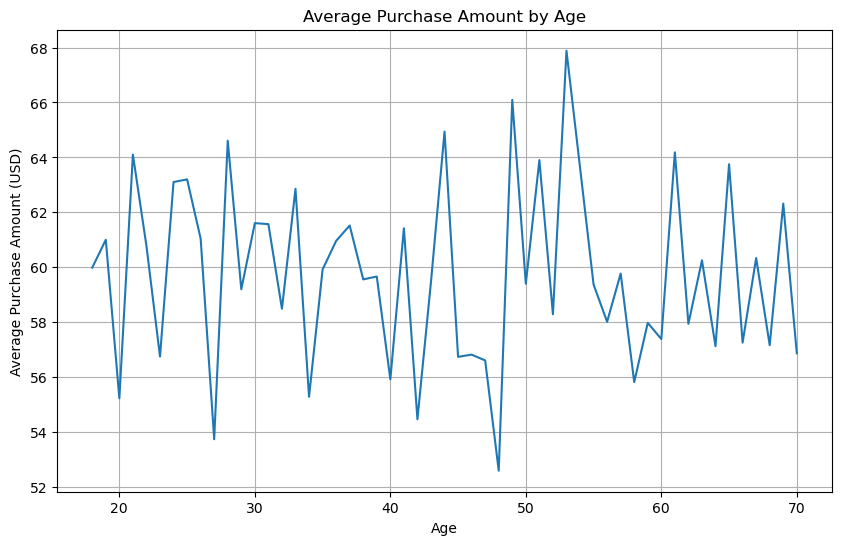

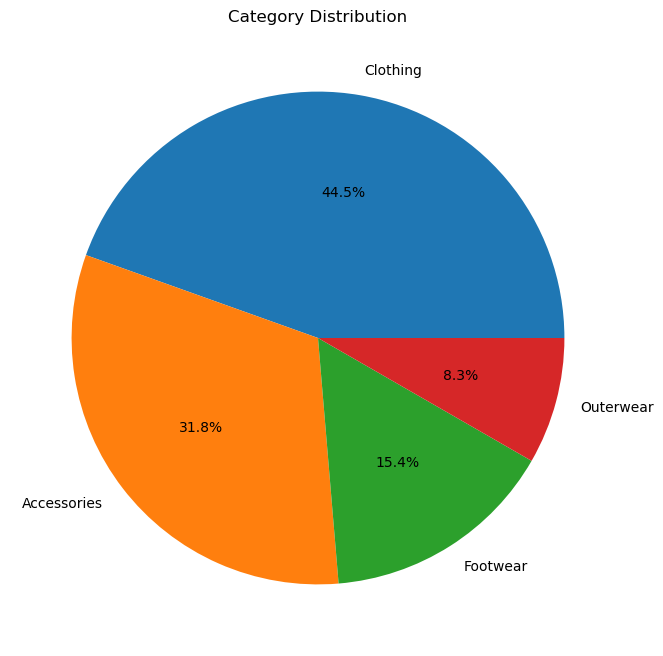

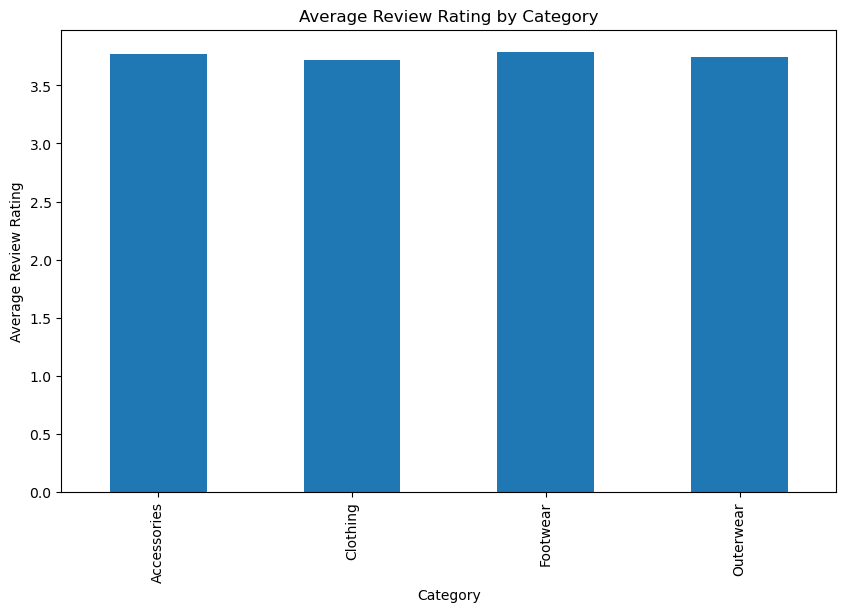

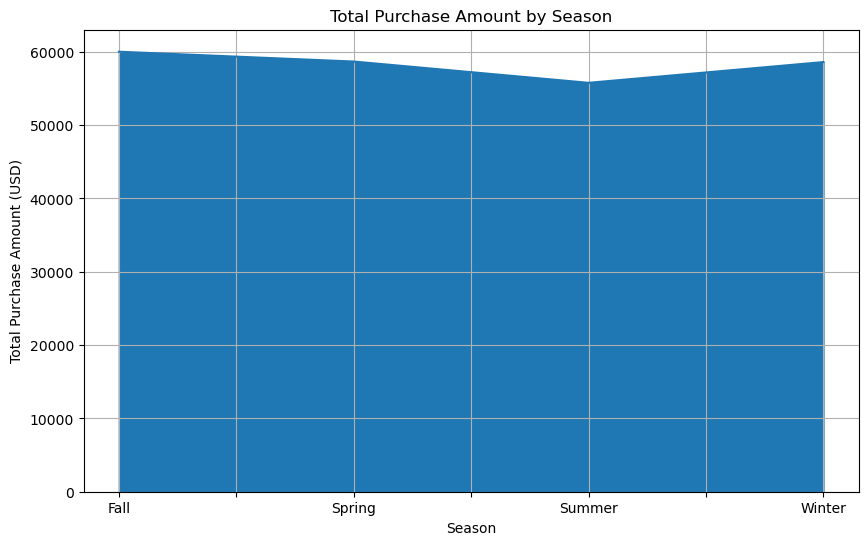

Cleaned data saved to: shopping_trends_cleaned.csv

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.81      0.86       558
           1       0.63      0.83      0.72       222

    accuracy                           0.82       780
   macro avg       0.78      0.82      0.79       780
weighted avg       0.84      0.82      0.82       780

Accuracy Score: 0.8153846153846154


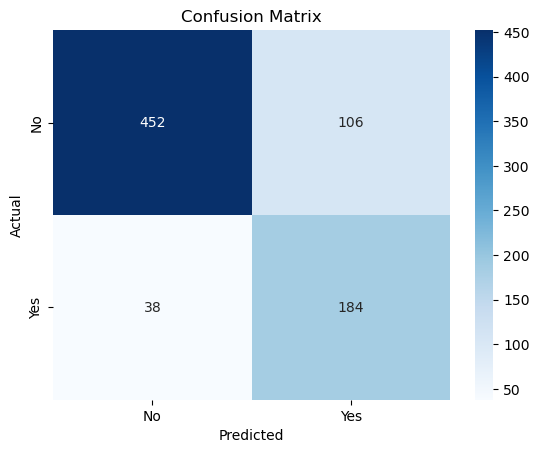


Feature Importances:
                  Feature  Importance
8       Discount Applied    0.408965
1  Purchase Amount (USD)    0.106326
0                    Age    0.100002
3     Previous Purchases    0.099473
2          Review Rating    0.088333
4                 Gender    0.079090
7          Shipping Type    0.047457
6                 Season    0.036807
5               Category    0.033547


C:\Users\dattu\AppData\Local\Temp\ipykernel_4124\3757598738.py:143: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')


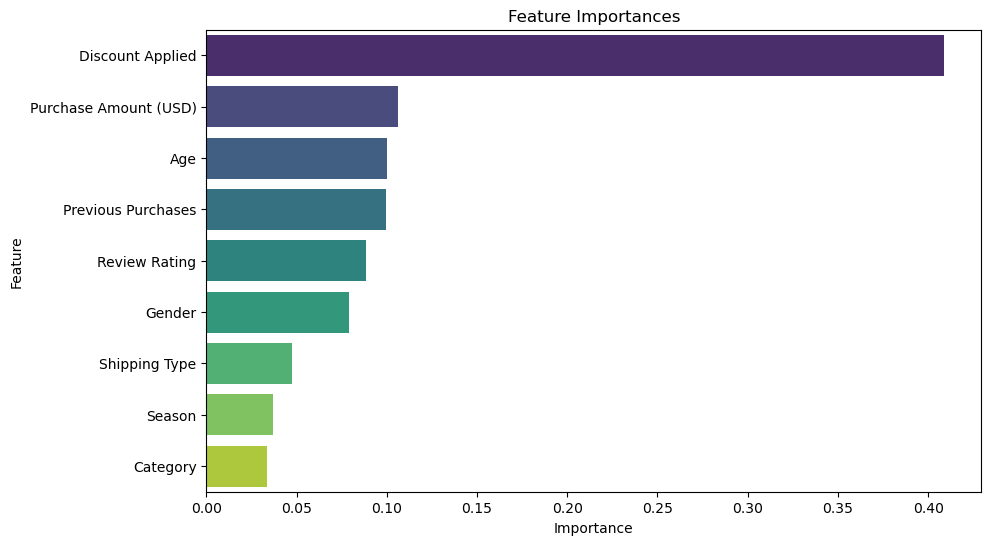

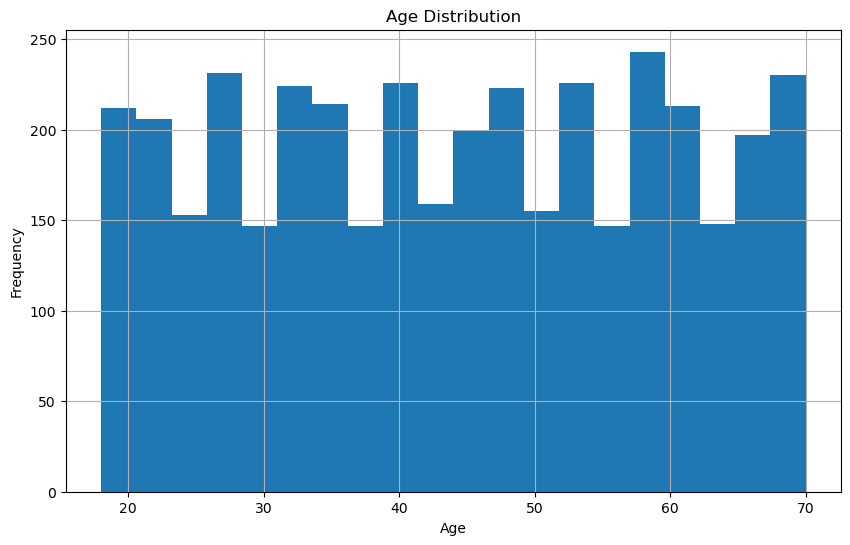

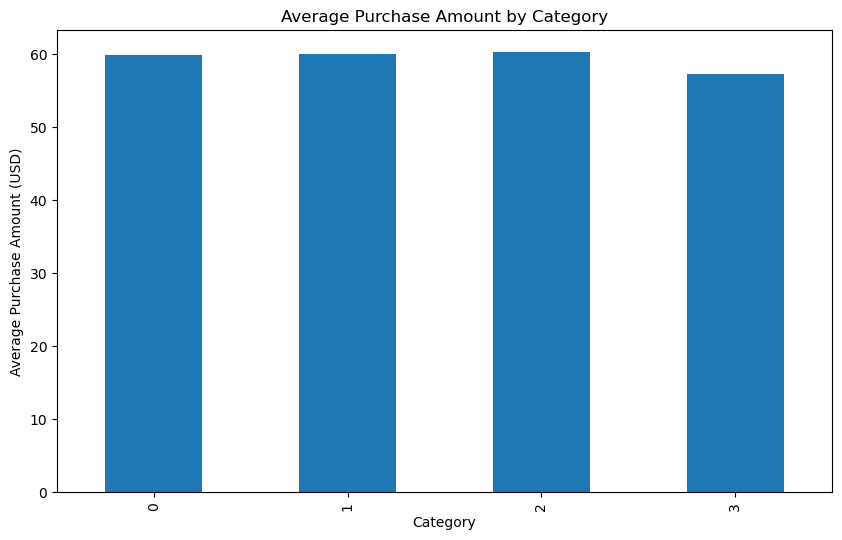

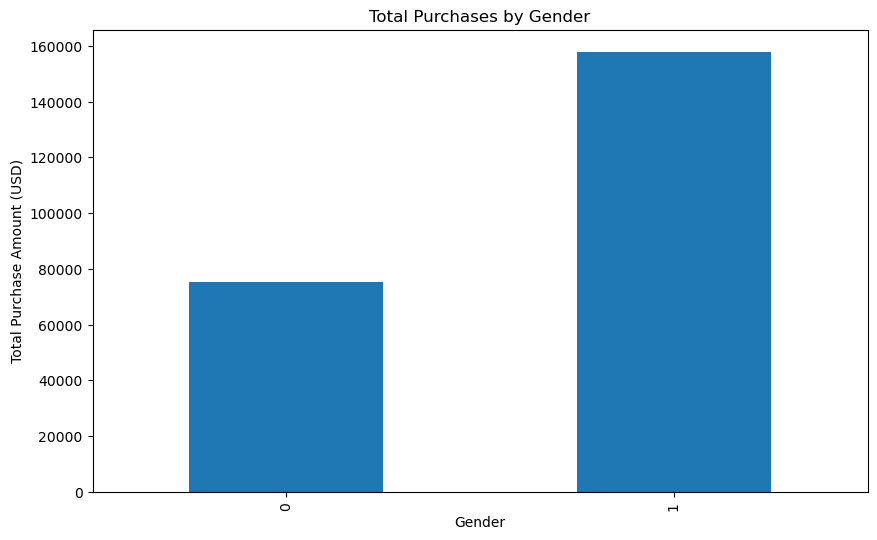


Most Common Items in Each Category:
 Category
0    Jewelry
1     Blouse
2    Sandals
3     Jacket
Name: Item Purchased, dtype: object


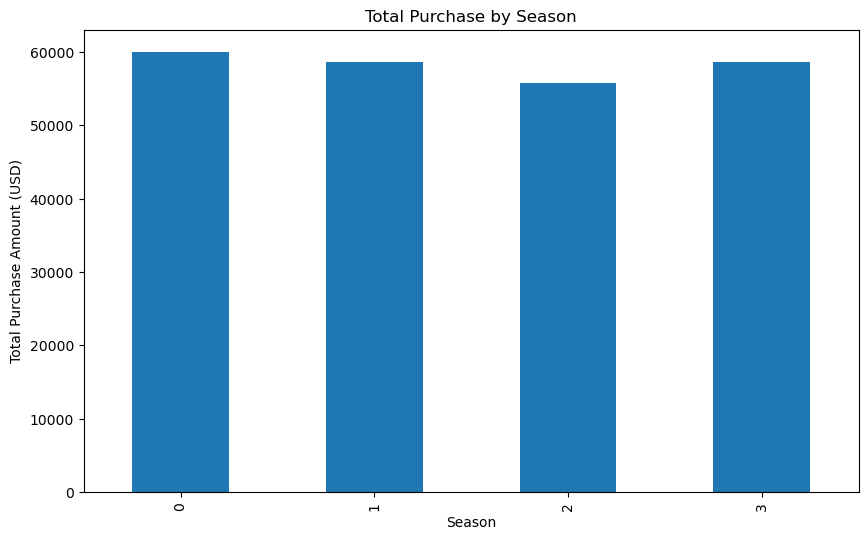

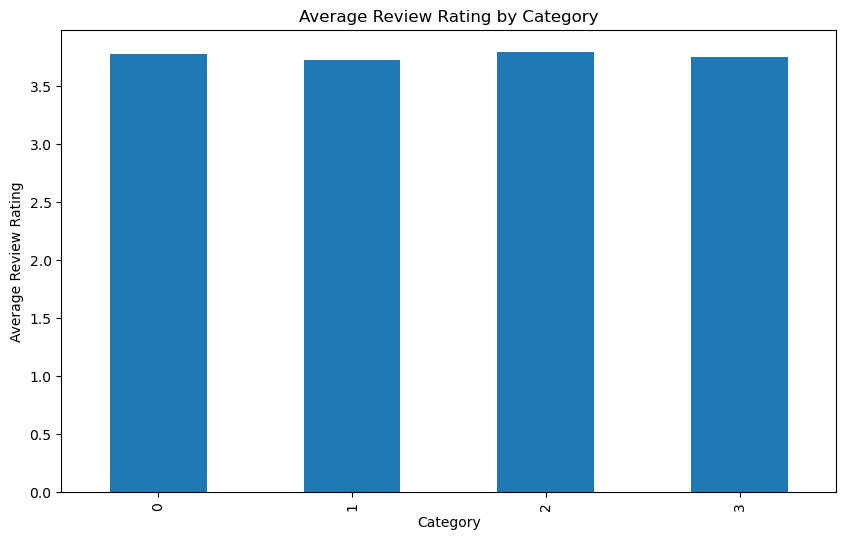

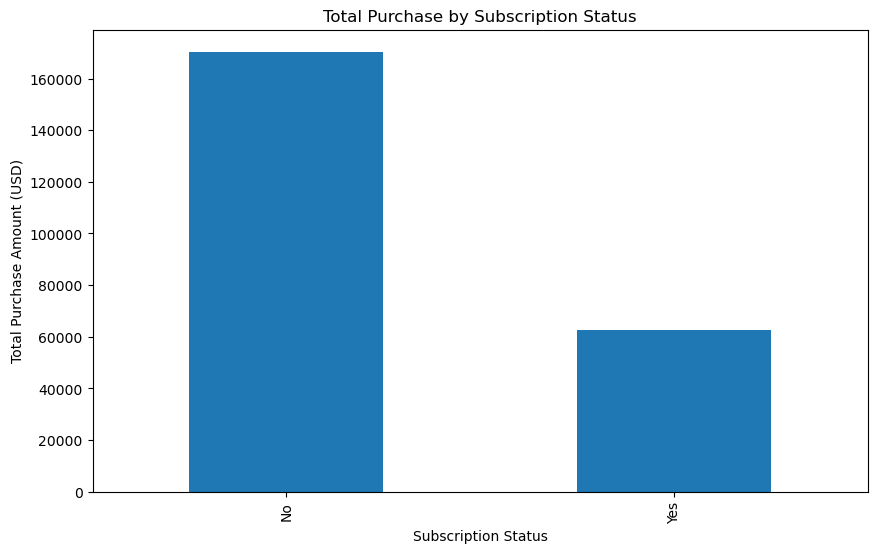

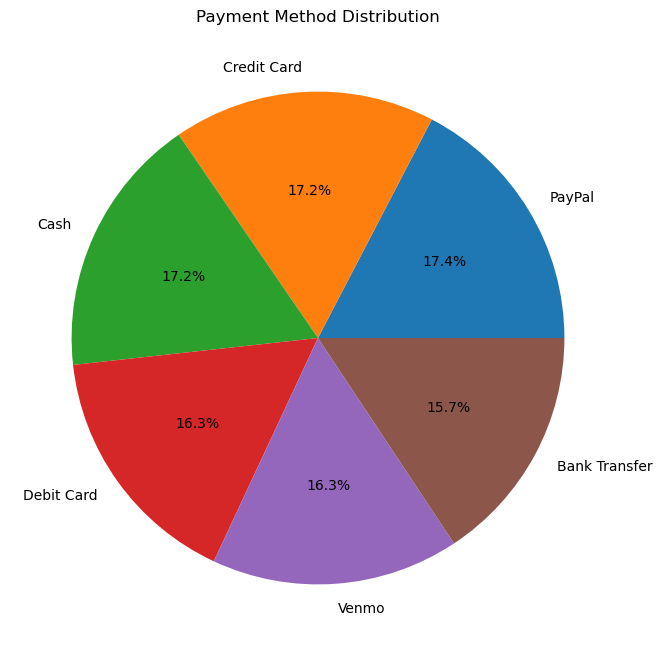

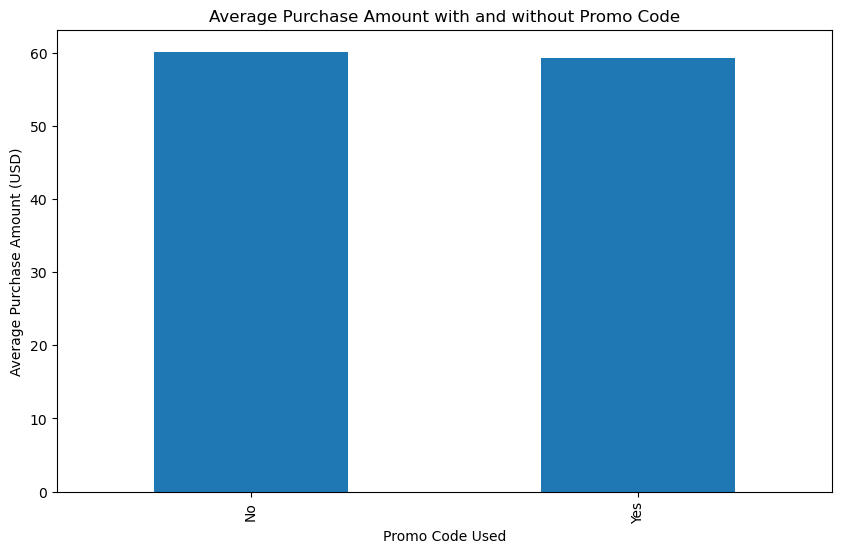

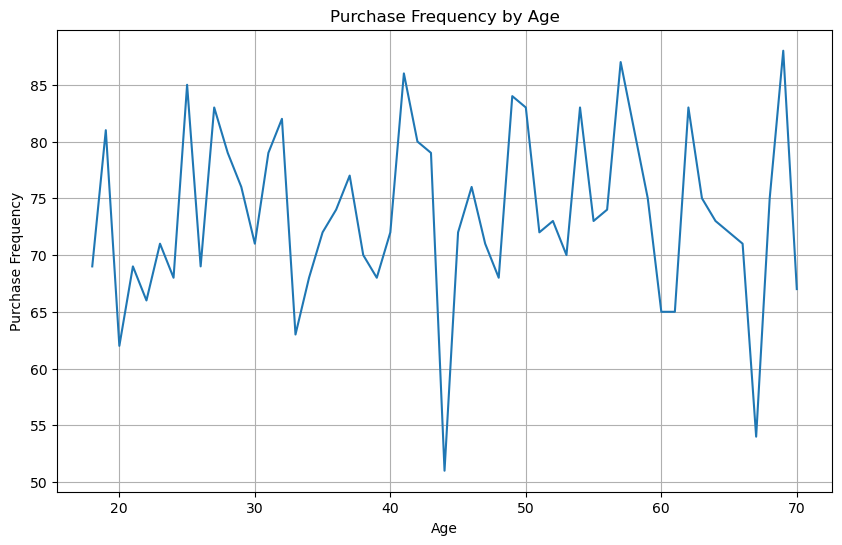

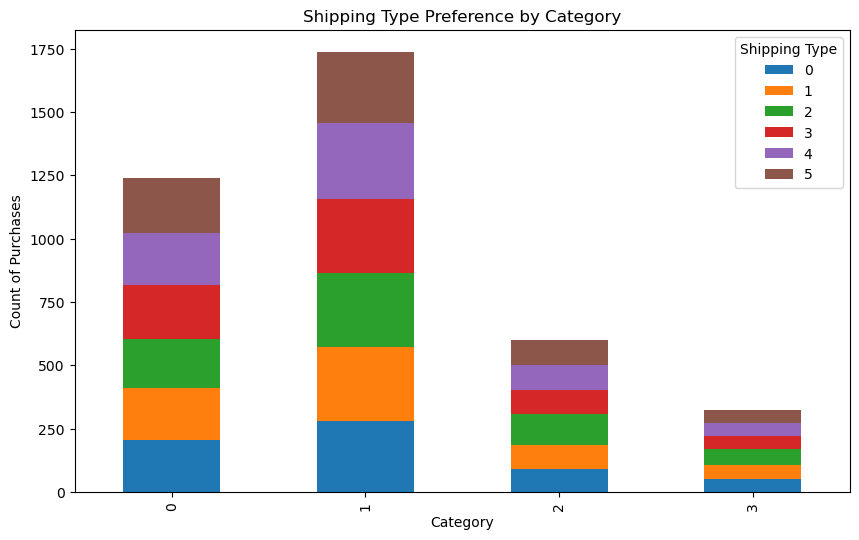

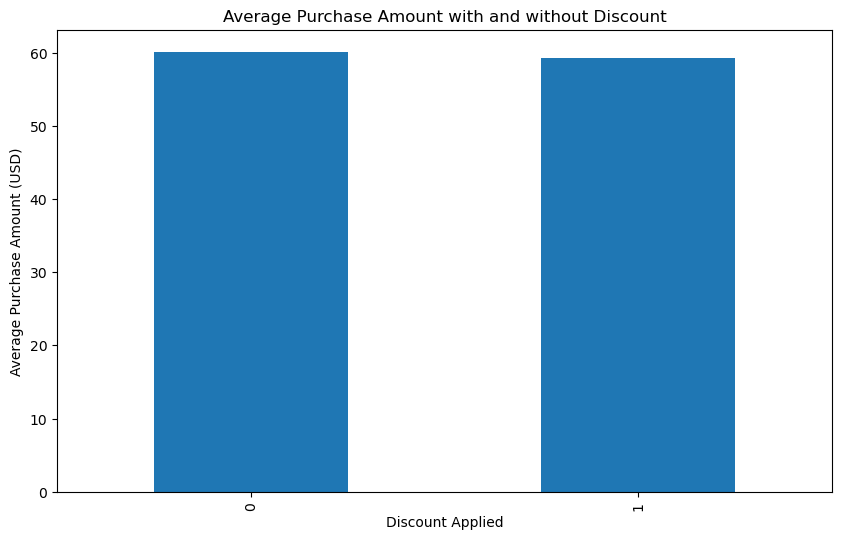


Average Number of Previous Purchases: 25.35153846153846


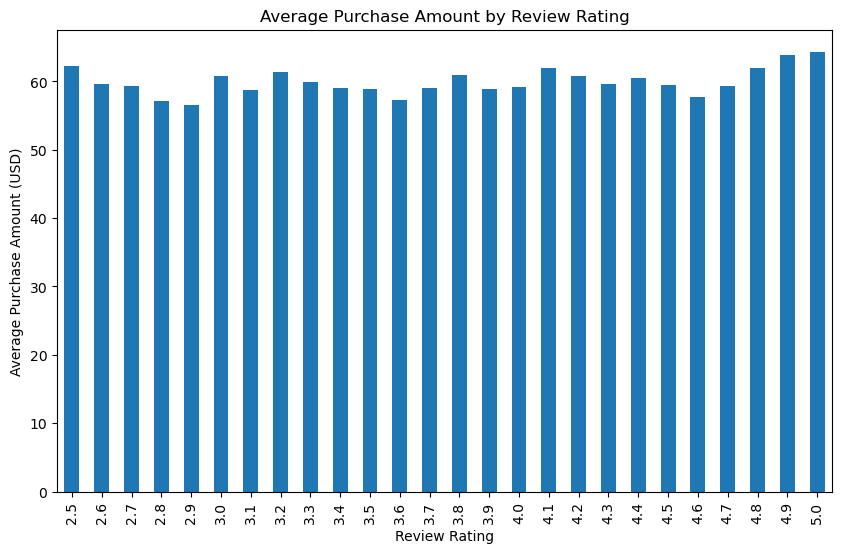

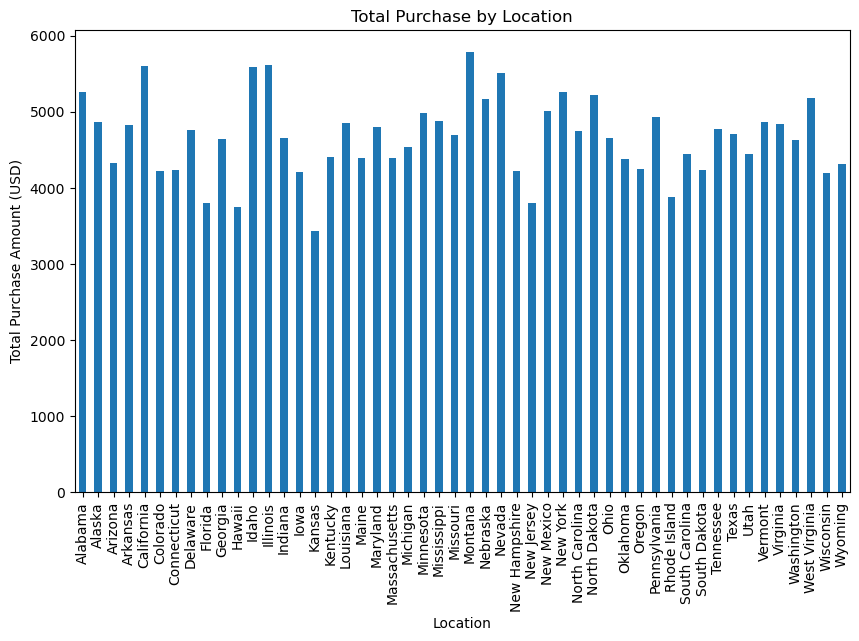

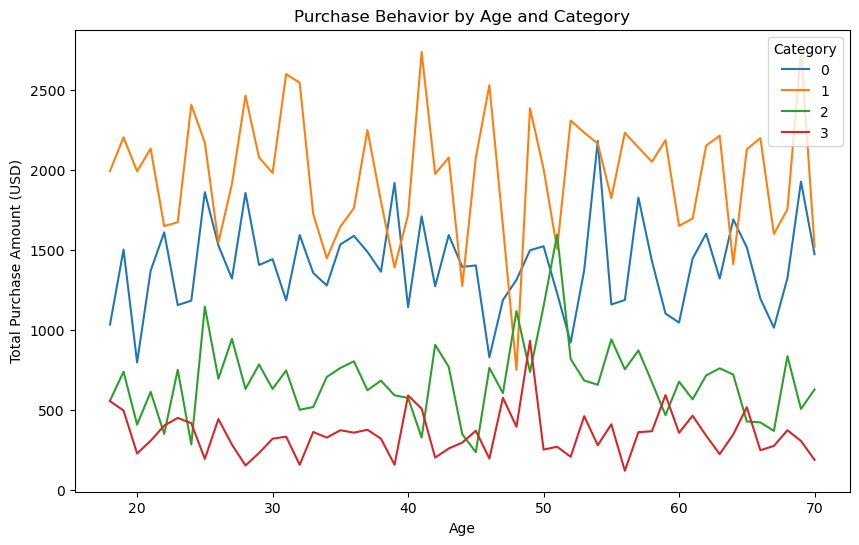

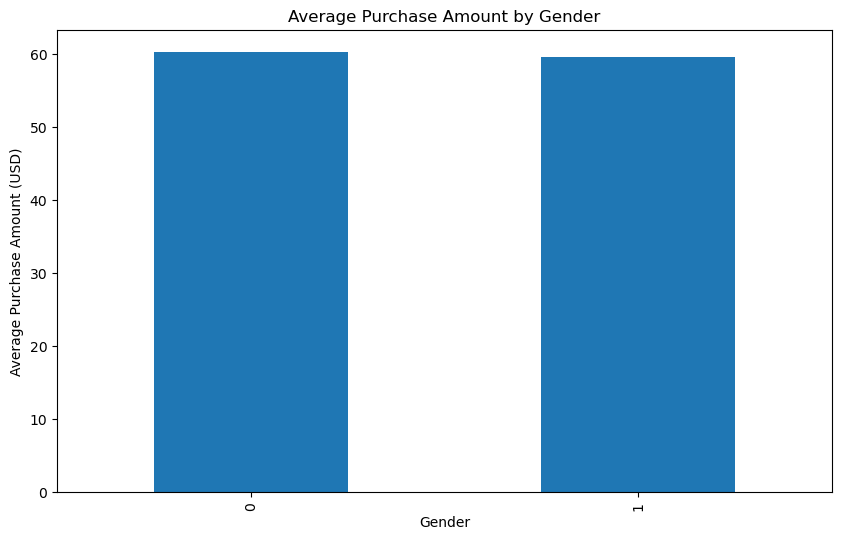

In [3]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Load the dataset
data = pd.read_csv('shopping_trends_updated1.csv')

# 1. Summary Statistics
summary_statistics = data.describe(include='all')
print("Summary Statistics:\n", summary_statistics)

# 2. Data Collection
print("\nData Information:")
data.info()
print("\nFirst few rows of the data:\n", data.head())

# 3. Data Cleaning
# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing Values:\n", missing_values)

# Check for duplicates
duplicates = data.duplicated().sum()
print("\nNumber of duplicate rows:", duplicates)

# Drop duplicates if any
data_cleaned = data.drop_duplicates()

# 4. Data Exploration
# Distribution of categorical variables
categorical_columns = ['Gender', 'Category', 'Season', 'Subscription Status', 'Shipping Type', 'Discount Applied']
for col in categorical_columns:
    print(f"\nValue counts for {col}:\n", data_cleaned[col].value_counts())

# Distribution of numerical variables
numerical_columns = ['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']
data_cleaned[numerical_columns].hist(figsize=(10, 8))
plt.suptitle('Distributions of Numerical Variables')
plt.show()

# 5. Correlations
# Select only numerical columns for correlation matrix
numerical_data = data_cleaned.select_dtypes(include=['float64', 'int64'])

# Computeing the correlation matrix
correlation_matrix = numerical_data.corr()
print("\nCorrelation Matrix:\n", correlation_matrix)

# Heatmaps of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# 6.  Visualizeations
# Line chart: Average purchase amount by age
avg_purchase_by_age = data_cleaned.groupby('Age')['Purchase Amount (USD)'].mean()
avg_purchase_by_age.plot(kind='line', figsize=(10, 6), title='Average Purchase Amount by Age')
plt.xlabel('Age')
plt.ylabel('Average Purchase Amount (USD)')
plt.grid()
plt.show()

# Pei chart: Distribution of categories
category_distribution = data_cleaned['Category'].value_counts()
category_distribution.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), title='Category Distribution')
plt.ylabel('')
plt.show()

# Bar chart: Average review rating by category
avg_rating_by_category = data_cleaned.groupby('Category')['Review Rating'].mean()
avg_rating_by_category.plot(kind='bar', figsize=(10, 6), title='Average Review Rating by Category')
plt.xlabel('Category')
plt.ylabel('Average Review Rating')
plt.show()

# Area graph: Total purchase amount by seasons
total_purchase_by_season = data_cleaned.groupby('Season')['Purchase Amount (USD)'].sum()
total_purchase_by_season.plot(kind='area', figsize=(10, 6), title='Total Purchase Amount by Season')
plt.xlabel('Season')
plt.ylabel('Total Purchase Amount (USD)')
plt.grid()
plt.show()

# Saving cleaned data to a new CSV file
cleaned_file_path = 'shopping_trends_cleaned.csv'
data_cleaned.to_csv(cleaned_file_path, index=False)
print("Cleaned data saved to:", cleaned_file_path)

# 7. Machine Learning: Predicting Subscription Status
# Define target and features
target = 'Subscription Status'  # Target variable
features = ['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']  # Numerical features
categorical_features = ['Gender', 'Category', 'Season', 'Shipping Type', 'Discount Applied']

# Encode categorical features
encoder = LabelEncoder()
for col in categorical_features:
    data_cleaned[col] = encoder.fit_transform(data_cleaned[col])

# Combine numerical and encoded categorical features
X = data_cleaned[features + categorical_features]
y = encoder.fit_transform(data_cleaned[target])  # Encode the target variable

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature importance
importances = model.feature_importances_
feature_names = features + categorical_features
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)
print("\nFeature Importances:\n", importance_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Data Analysis Questions:

# 1. Distribution of customer ages
data_cleaned['Age'].hist(bins=20, figsize=(10, 6))
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# 2. Average purchase amount by category
avg_purchase_by_category = data_cleaned.groupby('Category')['Purchase Amount (USD)'].mean()
avg_purchase_by_category.plot(kind='bar', figsize=(10, 6), title='Average Purchase Amount by Category')
plt.xlabel('Category')
plt.ylabel('Average Purchase Amount (USD)')
plt.show()

# 3. Purchases by gender
purchases_by_gender = data_cleaned.groupby('Gender')['Purchase Amount (USD)'].sum()
purchases_by_gender.plot(kind='bar', figsize=(10, 6), title='Total Purchases by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Purchase Amount (USD)')
plt.show()

# 4. Most commonly purchased items in each category
common_items_by_category = data_cleaned.groupby('Category')['Item Purchased'].apply(lambda x: x.mode()[0])
print("\nMost Common Items in Each Category:\n", common_items_by_category)

# 5. Total purchase by season
total_purchase_by_season = data_cleaned.groupby('Season')['Purchase Amount (USD)'].sum()
total_purchase_by_season.plot(kind='bar', figsize=(10, 6), title='Total Purchase by Season')
plt.xlabel('Season')
plt.ylabel('Total Purchase Amount (USD)')
plt.show()

# 6. Average review rating by category
avg_rating_by_category = data_cleaned.groupby('Category')['Review Rating'].mean()
avg_rating_by_category.plot(kind='bar', figsize=(10, 6), title='Average Review Rating by Category')
plt.xlabel('Category')
plt.ylabel('Average Review Rating')
plt.show()

# 7. Purchases by subscription status
purchase_by_subscription = data_cleaned.groupby('Subscription Status')['Purchase Amount (USD)'].sum()
purchase_by_subscription.plot(kind='bar', figsize=(10, 6), title='Total Purchase by Subscription Status')
plt.xlabel('Subscription Status')
plt.ylabel('Total Purchase Amount (USD)')
plt.show()

# 8. Payment method distribution (if column exists)
if 'Payment Method' in data_cleaned.columns:
    payment_method_distribution = data_cleaned['Payment Method'].value_counts()
    payment_method_distribution.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), title='Payment Method Distribution')
    plt.ylabel('')
    plt.show()

# 9. Average purchase amount with and without promo code
if 'Promo Code Used' in data_cleaned.columns:
    avg_purchase_with_promo = data_cleaned.groupby('Promo Code Used')['Purchase Amount (USD)'].mean()
    avg_purchase_with_promo.plot(kind='bar', figsize=(10, 6), title='Average Purchase Amount with and without Promo Code')
    plt.xlabel('Promo Code Used')
    plt.ylabel('Average Purchase Amount (USD)')
    plt.show()

# 10. Purchase frequency by age
purchase_frequency_by_age = data_cleaned.groupby('Age')['Purchase Amount (USD)'].count()
purchase_frequency_by_age.plot(kind='line', figsize=(10, 6), title='Purchase Frequency by Age')
plt.xlabel('Age')
plt.ylabel('Purchase Frequency')
plt.grid()
plt.show()

# 11. Correlation between product size and purchase amount
if 'Product Size' in data_cleaned.columns:
    correlation_size_purchase = data_cleaned[['Product Size', 'Purchase Amount (USD)']].corr()
    print("\nCorrelation between Product Size and Purchase Amount:\n", correlation_size_purchase)

# 12. Shipping type preference by category
shipping_by_category = data_cleaned.groupby('Category')['Shipping Type'].value_counts().unstack().fillna(0)
shipping_by_category.plot(kind='bar', stacked=True, figsize=(10, 6), title='Shipping Type Preference by Category')
plt.xlabel('Category')
plt.ylabel('Count of Purchases')
plt.show()

# 13. Average purchase amount with and without discount
avg_purchase_with_discount = data_cleaned.groupby('Discount Applied')['Purchase Amount (USD)'].mean()
avg_purchase_with_discount.plot(kind='bar', figsize=(10, 6), title='Average Purchase Amount with and without Discount')
plt.xlabel('Discount Applied')
plt.ylabel('Average Purchase Amount (USD)')
plt.show()

# 14. Product color distribution (if column exists)
if 'Product Color' in data_cleaned.columns:
    color_distribution = data_cleaned['Product Color'].value_counts()
    color_distribution.plot(kind='bar', figsize=(10, 6), title='Product Color Distribution')
    plt.xlabel('Color')
    plt.ylabel('Frequency')
    plt.show()

# 15. Average number of previous purchases
avg_previous_purchases = data_cleaned['Previous Purchases'].mean()
print(f"\nAverage Number of Previous Purchases: {avg_previous_purchases}")

# 16. Average purchase amount by review rating
avg_purchase_by_rating = data_cleaned.groupby('Review Rating')['Purchase Amount (USD)'].mean()
avg_purchase_by_rating.plot(kind='bar', figsize=(10, 6), title='Average Purchase Amount by Review Rating')
plt.xlabel('Review Rating')
plt.ylabel('Average Purchase Amount (USD)')
plt.show()

# 17. Purchases by location (if column exists)
if 'Location' in data_cleaned.columns:
    purchase_by_location = data_cleaned.groupby('Location')['Purchase Amount (USD)'].sum()
    purchase_by_location.plot(kind='bar', figsize=(10, 6), title='Total Purchase by Location')
    plt.xlabel('Location')
    plt.ylabel('Total Purchase Amount (USD)')
    plt.show()

# 18. Age vs Product Category (Purchase Amount)
age_category_purchase = data_cleaned.groupby(['Age', 'Category'])['Purchase Amount (USD)'].sum().unstack().fillna(0)
age_category_purchase.plot(kind='line', figsize=(10, 6), title='Purchase Behavior by Age and Category')
plt.xlabel('Age')
plt.ylabel('Total Purchase Amount (USD)')
plt.show()

# 19. Average purchase amount by gender
avg_purchase_by_gender = data_cleaned.groupby('Gender')['Purchase Amount (USD)'].mean()
avg_purchase_by_gender.plot(kind='bar', figsize=(10, 6), title='Average Purchase Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Purchase Amount (USD)')
plt.show()
